In [1]:
import numpy as np
import csv
import os
data_filename = 'ionosphere.data'

In [3]:
x = np.zeros((351,34), dtype='float')
y = np.zeros((351,), dtype='bool')

In [7]:
with open(data_filename,'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        data = [float(datum) for datum in row[:-1]]
        x[i] = data
        y[i] = row[-1]=='g'

In [10]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=14)
from sklearn.neighbors import  KNeighborsClassifier
estimator = KNeighborsClassifier()
estimator.fit(X_train,y_train)
y_predicted = estimator.predict(X_test)
accuracy = np.mean(y_test == y_predicted)*100
print("{0:.1f}%".format(accuracy))


86.4%


In [14]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator, x, y, scoring='accuracy')
avg_score = np.mean(score)*100
print("{0:.1f}%".format(avg_score))

82.6%


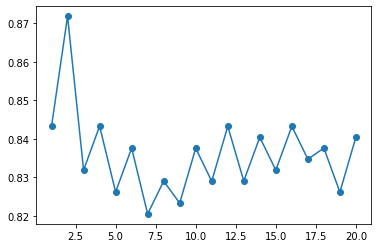

In [22]:
avg_scores = []
all_scores = []
parameter_values = list(range(1, 21))
for n_neighbors in parameter_values:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, x, y, scoring='accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)
from matplotlib import pyplot as plt
plt.plot(parameter_values,avg_scores,'-o')




In [23]:
x_broken = np.array(x)
x_broken[:,::2] /= 10
estimator = KNeighborsClassifier()
broken_scores = cross_val_score(estimator, x_broken, y ,scoring='accuracy')
print("{0:.1f}".format(np.mean(broken_scores)*100))



73.8


In [24]:
from sklearn.preprocessing import  MinMaxScaler
x_transformed = MinMaxScaler().fit_transform(x_broken)
estimator = KNeighborsClassifier()
transformed_score = cross_val_score(estimator, x_transformed, y, scoring='accuracy')
print("{0:.1f}".format(np.mean(transformed_score)*100))



82.9


In [25]:
from sklearn.pipeline import Pipeline
scaling_pipeline = Pipeline([('scale', MinMaxScaler()),('predict', KNeighborsClassifier())])
scores = cross_val_score(scaling_pipeline, x_broken, y, scoring='accuracy')
print("{0:.1f}".format(np.mean(scores)*100))

82.9
